### Linear Regression with Assumptions and OLS Method

This notebook explain about the assumptions of linear regression and ols method in detail. One of the most essential steps to take before applying linear regression.

#### Table of Content

##### <a href='#visualize'>Data Visualization </a> 

##### <a href='#preprocess'>Data Preprocessing </a> 

##### <a href='#creation'>Model Creation </a> 

##### <a href='#assumption'>Assumption of Linear Regression </a> 

##### <a href='#evaluation'>Model Evaluation </a> 

##### <a href='#ols'>OLS Method in Detail  </a> 

#### Import Librabries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Read data

In [ ]:
df = pd.read_csv('../input/insurance/insurance.csv')
df.head()

#### Statistical Description

In [ ]:
df.describe()

## <a id='visualize'>Data Visualization</a>

#### Target Variable

In [ ]:
sns.distplot(df['charges']);

#### skewness and kurtosis

In [ ]:
print("Skewness: %f" % df['charges'].skew())
print("Kurtosis: %f" % df['charges'].kurt())

#### Distplot

#### Distribution of bmi

In [ ]:
sns.distplot(df['bmi'])

#### Distribution of age

In [ ]:
sns.distplot(df['age'])

#### Pie Chart

In [ ]:
# Smoker
plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
labels = df.smoker.value_counts().index
colors = ['green','red']
explode = [0,.1]
sizes = df.smoker.value_counts().values
plt.pie(sizes, explode=explode, shadow=False,labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Smoker',fontsize = 15)
plt.legend(labels,bbox_to_anchor=(0.8, -0.04, 0.4, 1))

# Sex
plt.subplot(2,2,2)
label = df.sex.value_counts().index
size = df.sex.value_counts().values
color = ['teal','pink']
plt.pie(size, explode=explode, shadow=False,labels=label, colors=color, autopct='%1.1f%%')
plt.title('Sex',fontsize = 15)
plt.legend(label,bbox_to_anchor=(0.8, -0.04, 0.4, 1))
plt.show()

#### Swarmplot

In [ ]:
sns.swarmplot(x="smoker", y="charges",hue="sex", data=df)
plt.show()

#### Countplot

In [ ]:
sns.countplot(x = 'sex', hue = 'smoker', data = df)

In [ ]:
sns.countplot(x = 'region', hue = 'smoker', data = df)

In [ ]:
sns.countplot(x = 'children', hue = 'smoker', data = df)

In [ ]:
features = ['sex', 'smoker', 'children','region']
for var in features:
    sns.countplot(df[var])
    plt.show()

#### Boxplot

In [ ]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='age', y="charges", hue='smoker', data=df)
plt.xticks(rotation=90);

In [ ]:
# age < 20
sns.boxplot(x = 'smoker', y = 'charges', data = df[(df.age < 20)])

In [ ]:
# bmi > 30
sns.boxplot(x = 'sex', y = 'charges', data = df[(df.bmi > 30)])

In [ ]:
# bmi <= 30
sns.boxplot(x = 'sex', y = 'charges', data = df[(df.bmi <= 30)])

####  Top High Medical charges (all are smokers)

In [ ]:
df.sort_values(by="charges", ascending= False).head(10).style.background_gradient(cmap="spring")

#### Heatmap

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)

## <a id='preprocess'>Data Preprocessing</a>

In [ ]:
from sklearn.preprocessing import LabelEncoder
features = ['sex','smoker','region']
for feature in features:    
    lab = LabelEncoder()
    lab.fit(df[feature]) 
    df[feature] = lab.transform(df[feature])

#### Independent and Dependent Variable

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Split into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## <a id='creation'>Model Creation</a>

#### Linear Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

##  <a id='assumption'>Assumptions for Linear Regression</a>

#### Linearity

In [ ]:
sns.pairplot(df, x_vars=['age','bmi'], y_vars='charges', size=5, aspect=0.7)

#### Mean of Residual

In [ ]:
residuals = y_test - y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

### Checking for Homoscedasticity

Residual vs. Fitted Values Plot

Ideally, this plot shouldn't show any pattern. But if you see any shape (curve, U shape), it suggests non-linearity in the data set. In addition, if you see a funnel shape pattern, it suggests your data is suffering from heteroskedasticity, i.e. the error terms have non-constant variance.

In [ ]:
# seaborn residual plot
sns.residplot(y_pred, residuals, lowess=True,scatter_kws={'alpha': 0.5},line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

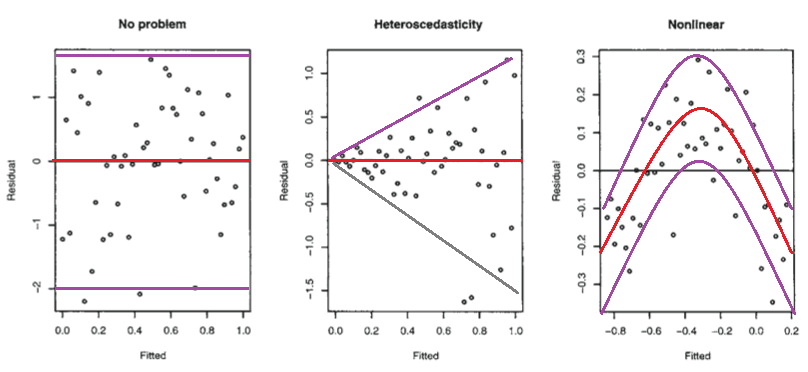

#### Breusch-Pagan

This test is used to determine presence of heteroskedasticity. If you find p < 0.05, you reject the null hypothesis and infer that heteroskedasticity is present.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(residuals, X_test)
lzip(names, test)

### Normal Distribution of error terms

In [ ]:
#### Usind distplot
p = sns.distplot(residuals, kde=True)
p = plt.title('Normality of error terms')

#### Normality Q-Q Plot

As the name suggests, this plot is used to determine the normal distribution of errors. It uses standardized values of residuals. Ideally, this plot should show a straight line. If you find a curved, distorted line, then your residuals have a non-normal distribution (problematic situation).

In [ ]:
sm.qqplot(residuals, line ='r')
plt.show()

### Checking for Autocorrelation

In [ ]:
# Plot the autocorrelation with 0.05 significance level
plot_acf(residuals, alpha = 0.05, lags=40)
plt.show() 

In [ ]:
# Plot the partial autocorrelation 
# 0.05 significance level
plot_pacf(residuals, alpha = 0.05, lags=40)
plt.show()

signs of autocorelation since there are spikes outside the blue confidence interval region.

#### Durbin Watson Statistic (DW) Test 

This test is used to check autocorrelation. Its value lies between 0 and 4. A DW=2 value shows no autocorrelation. However, a value between 0 to 2 implies positive autocorrelation, while 2 to 4 implies negative autocorrelation.


In [ ]:
# Using statsmodels.durbin_watson() method
dw = durbin_watson(residuals)
dw 

### Checking for Multicollinearity

#### Variance Inflation Factor (VIF) 

This metric is used to check multicollinearity. VIF <=4 implies no multicollinearity but VIF >=10 suggests high multicollinearity. Alternatively, you can also look at the tolerance (1/VIF) value to determine correlation in IVs. In addition, you can also create a correlation matrix to determine collinear variables.

In [ ]:
# Calculating VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

## <a id='evaluation'>Model Evaluation</a> 

In [ ]:
# R Square
r2_score(y_pred, y_test)

In [ ]:
# Mean Absolute Error
mean_absolute_error(y_pred, y_test)

In [ ]:
# Mean Squared Error
mean_squared_error(y_pred, y_test)

## <a id='ols'>OLS Method</a> 

OLS technique tries to reduce the sum of squared errors ∑[Actual(y) - Predicted(y')]² by finding the best possible value of regression coefficients (β0, β1, etc).

In [ ]:
x = sm.add_constant(X_train)
model = sm.OLS(y_train,x)

In [ ]:
res = model.fit()
res.params

In [ ]:
res.summary()

<b>F Statistics</b> - It evaluates the overall significance of the model. It compares the full model with an intercept only (no predictors) model. Its value can range between zero and any arbitrary large number. Naturally, higher the F statistics, better the model.

<b>Intercept</b> - This is the βo value. It's the prediction made by model when all the independent variables are set to zero.

<b>coef</b> - This represents regression coefficients for respective variables. It's the value of slope. Let's interpret it for age. We can say, when age is increased by 1 unit, holding other variables constant, charges increase by a value of 261.9106.

<b>Std. Error</b> - This determines the level of variability associated with the estimates. Smaller the standard error of an estimate is, more accurate will be the predictions.

<b>t value</b> - t statistic is generally used to determine variable significance, i.e. if a variable is significantly adding information to the model. t value > 2 suggests the variable is significant. I used it as an optional value as the same information can be extracted from the p value.

<b>p value</b> - It's the probability value of respective variables determining their significance in the model. p value < 0.05 is always desirable.

<b>Durbin Watson Test</b> - This test is used to check autocorrelation. Its value lies between 0 and 4. A DW = 2 value shows no autocorrelation. However, a value between 0 to 2 implies positive autocorrelation, while 2 to 4 implies negative autocorrelation.

<b>Jarque-Bera Test</b> - The Jarque-Bera Test, a type of Lagrange multiplier test, is a test for normality. Normality is one of the assumptions for many statistical tests, like the t test or F test; the Jarque-Bera test is usually run before one of these tests to confirm normality.
In general, a large J-B value indicates that errors are not normally distributed.

<b>Skew</b> - A normal distribution has a skew of zero (i.e. it’s perfectly symmetrical around the mean)

<b>Kurtosis</b> -  A normal distribution has kurtosis of three, kurtosis tells you how much data is in the tails and gives you an idea about how “peaked” the distribution is.

<b>Akaike Information Criteria (AIC)</b> - You can look at AIC as counterpart of adjusted r square in multiple regression. It's an important indicator of model fit. It follows the rule: Smaller the better. AIC penalizes increasing number of coefficients in the model. In other words, adding more variables to the model wouldn't let AIC increase. It helps to avoid overfitting.

Looking at the AIC metric of one model wouldn't really help. It is more useful in comparing models (model selection). So, build 2 or 3 models and compare their AIC. The model with the lowest AIC will be relatively better.

#### Here the overall p value of the model is significant that is its less than the alpha value 0.05 and F-statistics have higher value. 

**Thank you very much for your attention to my work. if you liked my work please upvote :)**